# matplotlib 入門 (6) nitta@tsuda.ac.jp

# 6章 散布図、等高線、塗りつぶし

## 6-1: 散布図

Axes.scatter(<i>x</i>, <i>y</i>, ...)

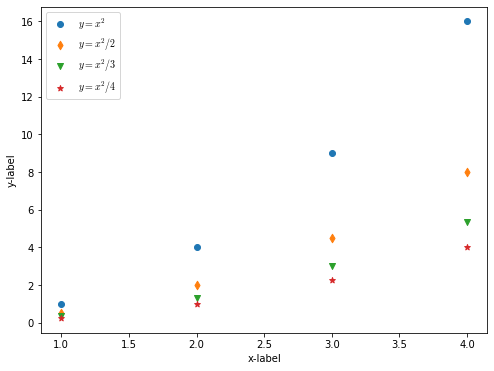

In [ ]:
# sample code 6-1
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [ 'DejaVu Sans' ]
plt.rcParams['mathtext.fontset'] = 'cm'


xs = np.array([1, 2, 3, 4])
ys = np.array([1, 4, 9, 16])

fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.scatter(xs, ys, label='$y=x^2$', marker='o')
ax.scatter(xs, ys/2, label='$y=x^2 / 2$', marker='d')
ax.scatter(xs, ys/3, label='$y = x^2 / 3$', marker='v')
ax.scatter(xs, ys/4, label='$y=x^2/4$', marker='*')
ax.set_ylabel('y-label')
ax.set_xlabel('x-label')

ax.legend()

plt.show()

## 6-2: 不規則な間隔の等高線を描く (contour/contourf)

マーカをプロットした散布図上に、等高線を描画し、 等高線で囲まれた範囲をそれぞれの色で塗り潰す。

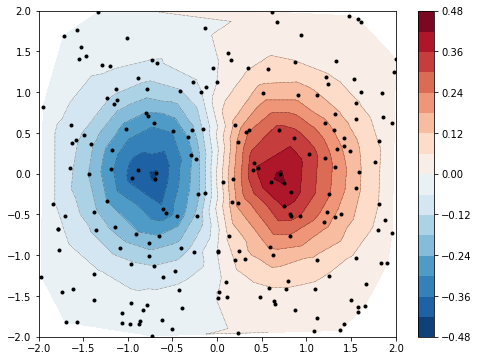

In [ ]:
# sample code 6-2
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

x = np.random.uniform(-2,2,200)
y = np.random.uniform(-2,2,200)
z = x * np.exp(- x**2 - y**2)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 等高線を描画
ax.tricontour(
    x,y,z,
    14,             # 等高線の間隔
    linewidths=0.5, #等高線の幅
    linestyles='dotted',
    colors='black'
)

# 等高線の領域の塗りつぶしを描画
cntr = ax.tricontourf(
    x,y,z,
    14,             # 等高線の間隔
    cmap='RdBu_r'   # RdBu_r=(Red,Blue), PuBu_r=(Purple,Blue)
)

# Axesに color bar を描画
fig.colorbar(cntr, ax=ax)

# markerをプロットし、軸の範囲とタイトルを設定
ax.plot(x,y,'ko',ms=3)   # marker='ko' (kuro, circle), markersize=3
ax.axis((-2,2,-2,2))

plt.show()

# 6-3: 曲線下の一定の区間面積をポリゴンで塗りつぶす (Polygon)
「曲線の下の一定区間を塗りつぶす」 → 「領域を表す」 → 「Polygonを生成してAxes に追加する (Axes.add_patch())」。

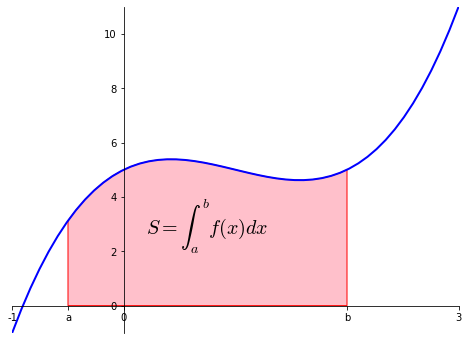

In [1]:
# sample code 6-3
# ポリゴンを使って曲線下の領域を表示する
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

def func(x):
    return x * (x - 1) * (x - 2) + 5

xs = np.linspace(-1, 3, 50)  # start, stop, num
ys = func(xs)

xmin, xmax = min(xs), max(xs)
ymin, ymax = min(ys), max(ys)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [ 'DejaVu Sans' ]
plt.rcParams['mathtext.fontset'] = 'cm'

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# x軸、y軸を原点に移動する
ax.spines['right'].set_color('none')   # remove
ax.spines['top'].set_color('none')     # remove
ax.spines['bottom'].set_position(('data',0))  # move x-axis to the origin point
ax.spines['left'].set_position(('data',0)) # move y-axis to the origin point

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.plot(xs, ys, 'blue', linewidth=2)

# 領域を表す範囲
a = xmin + 0.5
b = xmax - 1
x_area = np.linspace(a, b)
y_area = func(x_area)
param = [(a,0)] + list(zip(x_area, y_area)) + [(b,0)]

poly = Polygon(
    param,
    facecolor='pink',
    edgecolor='red'
)

ax.add_patch(poly)    # Polygon をaxに配置する

# x座標の目盛
ax.set_xticks([xmin, 0, a, b, xmax])
ax.set_xticklabels([f'{xmin:.0f}', 0, 'a', 'b', f'{xmax:.0f}'])

# 数式の表示
tx = (a+b) / 2
ty = func(tx) / 2
ax.text(
    tx,
    ty,
    r'$S = \int_{a}^{b} f(x) dx$',
    horizontalalignment='center',
    fontsize=20
)

plt.show()